# Peramalan Recursive multi-step 

## Latar Belakang

Peramalan multi-step rekursif mengggunaan nilai-nilai dari hasil prediksi dari langkah-langkah waktu sebelumnya sebagai masukan untuk meramalkan nilai-nilai  waktu berikutnya. Model awalnya memprediksi satu langkah ke depan dan kemudian menggunakan ramalan itu sebagai masukan untuk langkah waktu berikutnya, proses ini terus diulang ini sampai dengan k langkah yang ditentukan
Untuk memperjelas, karena nilai $t_{n-1}$ diperlukan untuk memprediksi $t_n$, dan $t_{n-1}$ tidak diketahui, maka diterapkan proses rekursif, di mana setiap prediksi baru didasarkan pada prediksi sebelumnya.


![Alt text](https://skforecast.org/0.9.1/img/diagram-recursive-mutistep-forecasting.png "a Data deret Berkala")

Gambar. peramalan recursive multi-step forecasting.

Saat menggunakan model pembelajaran mesin untuk peramalan multi-step rekursif, salah satu tantangan utamanya adalah mengubah data deret waktu menjadi format matriks yang menghubungkan setiap nilai  dengan nilai nilai sebelumnya (lag). Proses ini butuh rekayasa fitur yang cermat untuk memastikan model dapat secara akurat menangkap pola yang mendasari dalam data

![Alt text](https://skforecast.org/0.9.1/img/matrix_transformation_with_exog_variable.png "a Data deret Berkala")


Dengan menggunakan kelas ForecasterAutoreg dan ForecasterAutoregCustom, model pembelajaran mesin untuk peramalan multi-step rekursif dapat dibangun dengan mudah. Kelas-kelas ini dapat secara otomatis mengubah data deret waktu menjadi format matriks yang sesuai sebagai input ke algoritma pembelajaran mesin, dan menyediakan berbagai pilihan untuk mengatur parameter model guna mencapai kinerja terbaik.


Library yang diperlukan  adalah skforecast. Sehingga perlu diinstalasi

In [44]:
%%capture
!pip install skforecast

In [45]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error

In [46]:
url = (
    'https://raw.githubusercontent.com/saindata-bumi/webgis/refs/heads/main/datafull.csv'
)
data = pd.read_csv(url, sep=',', header=0, names=['waktu', 'SO2'])
data = data.set_index('waktu')


In [47]:
len(data)

1635

In [4]:

data = data.asfreq('D')


In [12]:
# Download data
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/saindata-bumi/webgis/refs/heads/main/datafull.csv'
)
data = pd.read_csv(url, sep=',', header=0, names=['waktu', 'SO2'])


# Data preprocessing
# ==============================================================================
data['waktu'] = pd.to_datetime(data['waktu'], format='%Y-%m-%d')
data = data.set_index('waktu')
#data = data.asfreq('MS')
data = data['SO2']
data = data.sort_index()

# Split train-test
# ==============================================================================
# ==============================================================================
steps = 3
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
#fig, ax = plt.subplots(figsize=(6, 3))
#data_train.plot(ax=ax, label='train')
#data_test.plot(ax=ax, label='test')
#ax.legend();

In [13]:
# Plot predictions
# ==============================================================================


In [43]:
import warnings
warnings.filterwarnings("ignore")
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Initialize the forecaster
forecaster = ForecasterAutoregDirect(
    regressor=svm.SVR(),
    steps=3,
    lags=1,
    transformer_y=None,
    n_jobs='auto'
)

# Fit the model
forecaster.fit(y=data_train)

# Make predictions
predictions = forecaster.predict()

error_mse = root_mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (rmse): {error_mse}")# Display the first 3 predictions


# Plot the results



Test error (rmse): 6.506386853578388


# Model SVR

In [28]:
from sklearn import svm
forecaster = ForecasterAutoreg(
                 regressor = svm.SVR(),
                 lags      = 20
             )

forecaster.fit(y=data_train)

Test error (rmse): 2.9779832983428274
Test error (mape): 2.8843840050626524


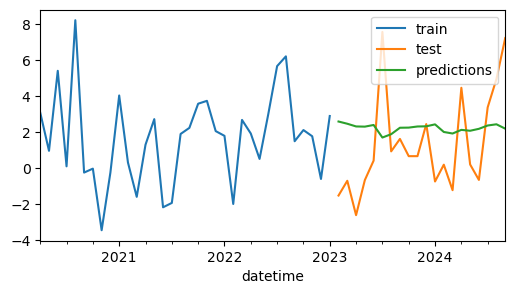

In [29]:
predictions = forecaster.predict(steps=20)
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();
error_mse = root_mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (rmse): {error_mse}")
mape=mean_absolute_percentage_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mape): {mape}")

In [33]:
y_train


datetime
2021-12-01    2.050
2022-01-01    1.787
2022-02-01   -1.992
2022-03-01    2.670
2022-04-01    1.916
2022-05-01    0.507
2022-06-01    3.007
2022-07-01    5.653
2022-08-01    6.196
2022-09-01    1.488
2022-10-01    2.108
2022-11-01    1.764
2022-12-01   -0.606
2023-01-01    2.887
Freq: MS, Name: y, dtype: float64

In [45]:
len(data_train)


3

In [44]:
# Create and fit forecaster
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import Ridge
# ==============================================================================
forecaster = ForecasterAutoregDirect(
                 regressor     = Ridge(),
                 steps         = 36,
                 lags          = 15,
                 transformer_y = None,
                 n_jobs        = 'auto'
             )

forecaster.fit(y=data_train)
forecaster

ValueError: Minimum length of `y` for training this forecaster is 51. Got 3. Reduce the number of predicted steps, 36, or the maximum lag, 15, if no more data is available.